In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
portfolio3 = pd.read_csv('estaticos_portfolio3.csv')
market_clean = pd.read_csv('market_clean.csv')
portfolio1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('estaticos_portfolio2.csv')


In [47]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market_clean = market_clean.drop(['Unnamed: 0'], axis = 1)

In [48]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market é', market_clean.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market é (462298, 40)


In [19]:
market_clean.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,nm_micro_regiao,fl_passivel_iss,qt_socios,idade_media_socios,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,NATAL,True,2.0,44.0,0.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,TERESINA,True,1.0,27.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,MANAUS,True,1.0,32.0,0.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,MANAUS,True,1.0,36.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NATAL,True,1.0,0.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [20]:
market_clean.dtypes

id                                        object
fl_matriz                                   bool
de_natureza_juridica                      object
sg_uf                                     object
natureza_juridica_macro                   object
de_ramo                                   object
setor                                     object
idade_empresa_anos                       float64
idade_emp_cat                             object
fl_me                                       bool
fl_sa                                       bool
fl_mei                                      bool
fl_ltda                                     bool
dt_situacao                               object
fl_st_especial                              bool
fl_email                                    bool
fl_telefone                                 bool
fl_rm                                       bool
nm_divisao                                object
nm_segmento                               object
fl_optante_simples  

In [49]:
market_clean_noId = market_clean.drop('id',axis=1)

In [50]:
categoricas = market_clean_noId.columns[market_clean_noId.dtypes == object]
nao_categoricas = market_clean_noId.columns[market_clean_noId.dtypes != object]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
market_clean_le = pd.DataFrame()
market_clean_le[categoricas] = market_clean_noId[categoricas].apply(lambda col: le.fit_transform(col))
market_clean_enconded = pd.concat([market_clean_noId[nao_categoricas],market_clean_le], axis =1)

In [51]:
market_clean_enconded.dtypes

fl_matriz                                   bool
idade_empresa_anos                       float64
fl_me                                       bool
fl_sa                                       bool
fl_mei                                      bool
fl_ltda                                     bool
fl_st_especial                              bool
fl_email                                    bool
fl_telefone                                 bool
fl_rm                                       bool
fl_optante_simples                          bool
vl_total_veiculos_pesados_grupo          float64
vl_total_veiculos_leves_grupo            float64
nu_meses_rescencia                       float64
empsetorcensitariofaixarendapopulacao    float64
fl_passivel_iss                             bool
qt_socios                                float64
idade_media_socios                       float64
qt_socios_feminino                       float64
vl_faturamento_estimado_aux              float64
vl_faturamento_estim

## Padronizando

In [30]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Padronizando os dados
market_dummies_stdscaler = StandardScaler().fit_transform(market_clean_enconded.select_dtypes(['float64','int64']))
market_dummies_stdscaler = pd.DataFrame(market_dummies_stdscaler)
colunas_int_float = market_clean_enconded.select_dtypes(['float64','int64']).columns

market_dummies_stdscaler.columns = colunas_int_float

market_dummies_stdscaler = pd.concat([market_dummies_stdscaler, market_clean_enconded.select_dtypes(['bool'])], axis=1)

In [81]:
market_dummies_stdscaler.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss
0,0.468908,-0.04937,-0.040273,0.037377,-0.791301,0.300849,0.673370,-0.498539,0.079092,-0.045441,...,False,False,False,False,False,True,True,True,True,True
1,-0.882484,-0.04937,-0.040273,-1.146814,-0.379493,-0.042511,-0.078534,-0.498539,-0.018107,-0.045865,...,False,False,True,False,False,True,True,True,True,True
2,-0.296966,-0.04937,-0.040273,0.291132,-0.164715,-0.042511,0.142614,-0.498539,-0.023429,-0.045888,...,False,False,True,False,False,False,True,True,True,True
3,-0.357370,-0.04937,-0.040273,0.291132,-0.373521,-0.042511,0.319533,-0.498539,-0.018107,-0.045865,...,False,False,False,False,False,True,True,True,True,True
4,-0.701843,-0.04937,-0.040273,0.375717,1.732643,-0.042511,-1.272734,-0.498539,-0.018107,-0.045865,...,False,False,False,False,False,True,True,True,True,True


In [82]:
# Convertendo as colunas bool em valores 1 e 0    
for i in market_dummies_stdscaler.select_dtypes(bool).columns:
    market_dummies_stdscaler[i] = np.where(market_dummies_stdscaler[i] == True, 1,0)

In [84]:
market_dummies_stdscaler.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss
0,0.468908,-0.04937,-0.040273,0.037377,-0.791301,0.300849,0.673370,-0.498539,0.079092,-0.045441,...,0,0,0,0,0,1,1,1,1,1
1,-0.882484,-0.04937,-0.040273,-1.146814,-0.379493,-0.042511,-0.078534,-0.498539,-0.018107,-0.045865,...,0,0,1,0,0,1,1,1,1,1
2,-0.296966,-0.04937,-0.040273,0.291132,-0.164715,-0.042511,0.142614,-0.498539,-0.023429,-0.045888,...,0,0,1,0,0,0,1,1,1,1
3,-0.357370,-0.04937,-0.040273,0.291132,-0.373521,-0.042511,0.319533,-0.498539,-0.018107,-0.045865,...,0,0,0,0,0,1,1,1,1,1
4,-0.701843,-0.04937,-0.040273,0.375717,1.732643,-0.042511,-1.272734,-0.498539,-0.018107,-0.045865,...,0,0,0,0,0,1,1,1,1,1


In [85]:
market_dummies_stdscaler['id'] = market_clean['id']

## Analisando se os ids estão presentes nos 3 portfólios, se está só em 2 ou só em 1 portfólio

In [86]:
port1 = list(portfolio1['id'])
port2 = list(portfolio2['id'])
port3 = list(portfolio3['id'])

In [87]:
port1_port2 = [x for x in port1 if x in port2]
port1_port3 = [x for x in port1 if x in port3]
port2_port3 = [x for x in port2 if x in port3]
port1_port2_port3 = [x for x in port1 if x in port2 and port3]

In [88]:
print(f"Port1 and Port2: {len(port1_port2)}")
print(f"Port1 and Port3: {len(port1_port3)}")
print(f"Port2 and Port3: {len(port2_port3)}")
print(f"Port1, Port2 and Port3: {len(port1_port2_port3)}")

Port1 and Port2: 0
Port1 and Port3: 0
Port2 and Port3: 108
Port1, Port2 and Port3: 0


# Pegando os ids do Market que não estão em nenhum portfólio

In [89]:
df = pd.concat([portfolio1,portfolio2,portfolio3], axis=0)
df = pd.DataFrame(df.id)

/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [90]:
df2 = market_dummies_stdscaler

In [91]:
merge_not = df2[~df2['id'].isin(df['id'])]

In [92]:
merge_not.shape

(461020, 40)

# Merge nos portfólios  com o market

In [93]:
df_portfolio2 = pd.merge(portfolio2, market_dummies_stdscaler, on='id')
df_portfolio3 = pd.merge(portfolio3, market_dummies_stdscaler, on='id')

In [94]:
df_portfolio1 = pd.merge(portfolio1.id, market_dummies_stdscaler, on='id')

#### Tirando uma amostra do portfólio 1 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 1

In [95]:
df_portfolio1.shape

(555, 40)

In [96]:
df_portfolio1_part = df_portfolio1[0:499]

In [97]:
amostra_port1 = df_portfolio1[499:]

## Criando um portfólio 4 que será os ids que estão no portfólio 2 e 3

In [98]:
portfolio4 = pd.DataFrame(port2_port3, columns = ['id'])

In [99]:
portfolio4.head()

,id
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...


In [100]:
df_portfolio4 =pd.merge(portfolio4, market_dummies_stdscaler, on='id')

In [101]:
df_portfolio4.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...,0.669779,-0.035567,-0.039443,0.037377,-0.186836,0.300849,1.823340,0.936862,0.900230,...,0,0,0,0,0,0,1,0,0,1
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,3.526138,-0.021765,-0.039443,0.037377,-0.480721,-0.385871,-1.272734,-0.498539,0.787135,...,0,0,0,0,0,0,0,1,0,1
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,3.527277,-0.049370,-0.040273,0.037377,-0.791301,-0.385871,-1.272734,-0.498539,1.258364,...,0,0,0,0,0,0,0,0,0,1
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...,0.113039,-0.049370,-0.037782,0.037377,1.269004,0.300849,0.894518,0.936862,0.718593,...,0,0,0,0,0,1,1,0,0,1
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...,3.525283,0.212883,-0.015360,0.037377,0.154787,-0.385871,-1.272734,-0.498539,7.972086,...,0,0,0,0,0,0,0,0,0,1


#### Tirando uma amostra do portfólio 4 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 4

In [31]:
df_portfolio4.shape

(108, 40)

In [102]:
df_portfolio4_part = df_portfolio4[0:97]

In [103]:
amostra_port4 = df_portfolio4[97:]

## Tirando o portfólio 4 do portfólio 2

In [104]:
df_portfolio2_without4 = df_portfolio2[~df_portfolio2['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 2 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 2

In [106]:
df_portfolio2_without4.shape

(458, 40)

In [107]:
df_portfolio2_part = df_portfolio2_without4[0:412]

In [108]:
amostra_port2 = df_portfolio2_without4[412:]

## Tirando o portfólio 4 do portfólio 3

In [109]:
df_portfolio3_without4 = df_portfolio3[~df_portfolio3['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 3 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 3

In [111]:
df_portfolio3_without4.shape

(157, 40)

In [112]:
df_portfolio3_part = df_portfolio3_without4[0:141]

In [113]:
amostra_port3 = df_portfolio3_without4[141:]

## Colocando uma coluna de target 0 para os que são do portfólio 1

In [114]:
df_portfolio1_part_target = df_portfolio1_part.copy()

In [115]:
df_portfolio1_part_target['Target'] = 0

In [116]:
df_portfolio1_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,-0.967391,-0.04937,-0.040273,-1.908080,-0.457625,-0.042511,0.717599,-0.498539,-0.018107,...,0,1,0,0,0,0,0,1,0,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,-0.349677,-0.04937,-0.040273,-0.047208,0.847053,-0.385871,-1.272734,-0.498539,-0.018107,...,0,0,0,0,1,1,0,0,0,0
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,-0.201517,-0.04937,-0.040273,0.121962,-0.090403,-0.042511,1.115666,0.936862,-0.023429,...,0,1,0,0,0,0,1,1,0,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1.135059,-0.04937,-0.040273,0.291132,-0.256951,-0.042511,0.496451,-0.498539,-0.023429,...,0,0,0,0,0,0,0,1,0,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,0.912819,-0.04937,-0.040273,0.037377,-0.017873,0.300849,0.186844,0.936862,0.075665,...,0,0,0,0,1,1,1,1,0,0


## Colocando uma coluna de target 1 para os que são do portfólio 2

In [117]:
df_portfolio2_part_target = df_portfolio2_part.copy()

In [118]:
df_portfolio2_part_target['Target'] = 1

In [119]:
df_portfolio2_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,0.134693,-0.049370,-0.036951,0.037377,1.659850,-0.385871,-1.272734,-0.498539,10.868000,...,0,0,0,0,1,1,0,0,1,1
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,3.519299,0.171474,-0.023664,0.037377,0.093797,-0.385871,-1.272734,-0.498539,5.855841,...,0,0,0,0,0,0,1,0,1,1
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,3.091059,-0.049370,-0.040273,0.037377,0.435939,-0.385871,-1.272734,-0.498539,7.343210,...,0,0,0,0,0,0,0,0,1,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,1.073231,-0.007962,-0.030308,0.037377,-0.170247,0.987568,0.879775,-0.498539,0.910511,...,0,0,0,0,0,0,0,0,1,1
5,77ed856930ed9c2b5348eca951d152b5655c98af3bb446...,1.048443,-0.007962,-0.036951,2.152004,1.411288,0.300849,0.783944,0.936862,0.629488,...,0,0,0,0,1,1,0,0,1,1


## Colocando uma coluna de target 3 para os que são do portfólio 3

In [120]:
df_portfolio3_part_target = df_portfolio3_part.copy()

In [121]:
df_portfolio3_part_target['Target'] = 2

In [122]:
df_portfolio3_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,1.233928,-0.021765,-0.036121,0.291132,-0.225512,-0.385871,-1.272734,-0.498539,4.675199,...,0,0,0,0,1,0,0,0,1,2
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,3.164855,-0.049370,-0.040273,0.037377,0.860876,-0.385871,-1.272734,-0.498539,3.059314,...,0,0,0,0,1,1,1,0,1,2
5,5de08033561948a226f8ba8f8668a4ff4123be8ea7114d...,3.862347,-0.035567,-0.036951,0.037377,0.101358,0.644208,0.407992,-0.498539,1.388594,...,0,0,0,0,1,1,1,0,1,2
6,194e619cb6417f92f75653406cf04106debc5035f13a88...,0.601682,-0.049370,-0.040273,0.037377,0.799675,-0.385871,-1.272734,-0.498539,6.479577,...,0,0,0,0,0,0,1,0,1,2
7,cc734f72fdd8753ba2e7638f3d09e0597fd859735904da...,1.723426,0.019644,-0.037782,0.037377,-0.037913,-0.042511,1.513732,-0.498539,0.872813,...,0,0,0,0,0,0,1,0,1,2


## Colocando uma coluna de target 4 para os que são do portfólio 4

In [123]:
df_portfolio4_part_target = df_portfolio4_part.copy()

In [124]:
df_portfolio4_part_target['Target'] = 3

In [125]:
df_portfolio4_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...,0.669779,-0.035567,-0.039443,0.037377,-0.186836,0.300849,1.823340,0.936862,0.900230,...,0,0,0,0,0,1,0,0,1,3
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,3.526138,-0.021765,-0.039443,0.037377,-0.480721,-0.385871,-1.272734,-0.498539,0.787135,...,0,0,0,0,0,0,1,0,1,3
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,3.527277,-0.049370,-0.040273,0.037377,-0.791301,-0.385871,-1.272734,-0.498539,1.258364,...,0,0,0,0,0,0,0,0,1,3
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...,0.113039,-0.049370,-0.037782,0.037377,1.269004,0.300849,0.894518,0.936862,0.718593,...,0,0,0,0,1,1,0,0,1,3
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...,3.525283,0.212883,-0.015360,0.037377,0.154787,-0.385871,-1.272734,-0.498539,7.972086,...,0,0,0,0,0,0,0,0,1,3


### Concatenando todos para que possam formar somente 1 dataframe

In [126]:
df_all_port = pd.concat([df_portfolio1_part_target, df_portfolio2_part_target, df_portfolio3_part_target, df_portfolio4_part_target],axis=0)

In [128]:
df_all_port.tail()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
92,40911402ea6fabe23ca67a770dbb23dbeaa5f8541a0534...,4.261810,-0.049370,-0.039443,0.037377,-0.031713,-0.042511,0.319533,-0.498539,1.203530,...,0,0,0,0,0,0,0,0,1,3
93,b604d90e926ace74d8e34300a864c85bdd25da46c7935b...,1.692370,-0.049370,-0.036951,0.037377,-0.791301,-0.042511,1.469503,-0.498539,1.309770,...,0,0,0,0,1,1,0,0,1,3
94,b8c31a73612829608c41fc90a281b27943a3be89710292...,1.114830,-0.035567,-0.035290,0.291132,2.255489,0.300849,1.425273,0.936862,1.673045,...,0,0,0,0,1,1,1,0,1,3
95,59c5648b89161593f4d98cbc9df5371382d986e885a9c7...,3.521864,0.130066,-0.031138,0.037377,0.123269,-0.385871,-1.272734,-0.498539,2.970209,...,0,0,0,0,0,0,0,0,1,3
96,44fbf9fa03e9419263bb9e6c595539bf4803401844260e...,1.239911,0.005841,-0.034460,0.037377,-0.337990,-0.385871,-1.272734,-0.498539,0.977340,...,0,0,0,0,1,1,0,0,1,3


In [129]:
df_all_port.shape

(1149, 41)

# Colocando o index como Id

In [130]:
df_all_port_indexid = df_all_port.copy()

In [131]:
df_all_port_indexid.set_index('id', inplace=True)

In [132]:
df_all_port_indexid.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
id,,,,,,,,,,,,,,,,,,,,,
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9,-0.967391,-0.04937,-0.040273,-1.908080,-0.457625,-0.042511,0.717599,-0.498539,-0.018107,-0.045865,...,0,1,0,0,0,0,0,1,0,0
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702,-0.349677,-0.04937,-0.040273,-0.047208,0.847053,-0.385871,-1.272734,-0.498539,-0.018107,-0.045750,...,0,0,0,0,1,1,0,0,0,0
a95d6f30bba445bd3d6b0c5b36f865b38ec01d1733609095d359649cfedf15d1,-0.201517,-0.04937,-0.040273,0.121962,-0.090403,-0.042511,1.115666,0.936862,-0.023429,-0.045888,...,0,1,0,0,0,0,1,1,0,0
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e74532d5040fbc933b8,1.135059,-0.04937,-0.040273,0.291132,-0.256951,-0.042511,0.496451,-0.498539,-0.023429,-0.045888,...,0,0,0,0,0,0,0,1,0,0
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251dfe8d321e9e6de7f5,0.912819,-0.04937,-0.040273,0.037377,-0.017873,0.300849,0.186844,0.936862,0.075665,-0.045044,...,0,0,0,0,1,1,1,1,0,0


## Analisando o balancemento das targets

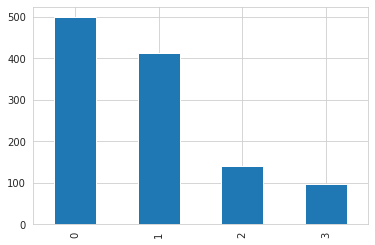

In [133]:
sns.set_style('whitegrid')
df_all_port_indexid['Target'].value_counts().plot(kind = 'bar')

In [134]:
#Criando o X e y
X = df_all_port_indexid.drop('Target', axis=1)
y = df_all_port_indexid['Target']

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


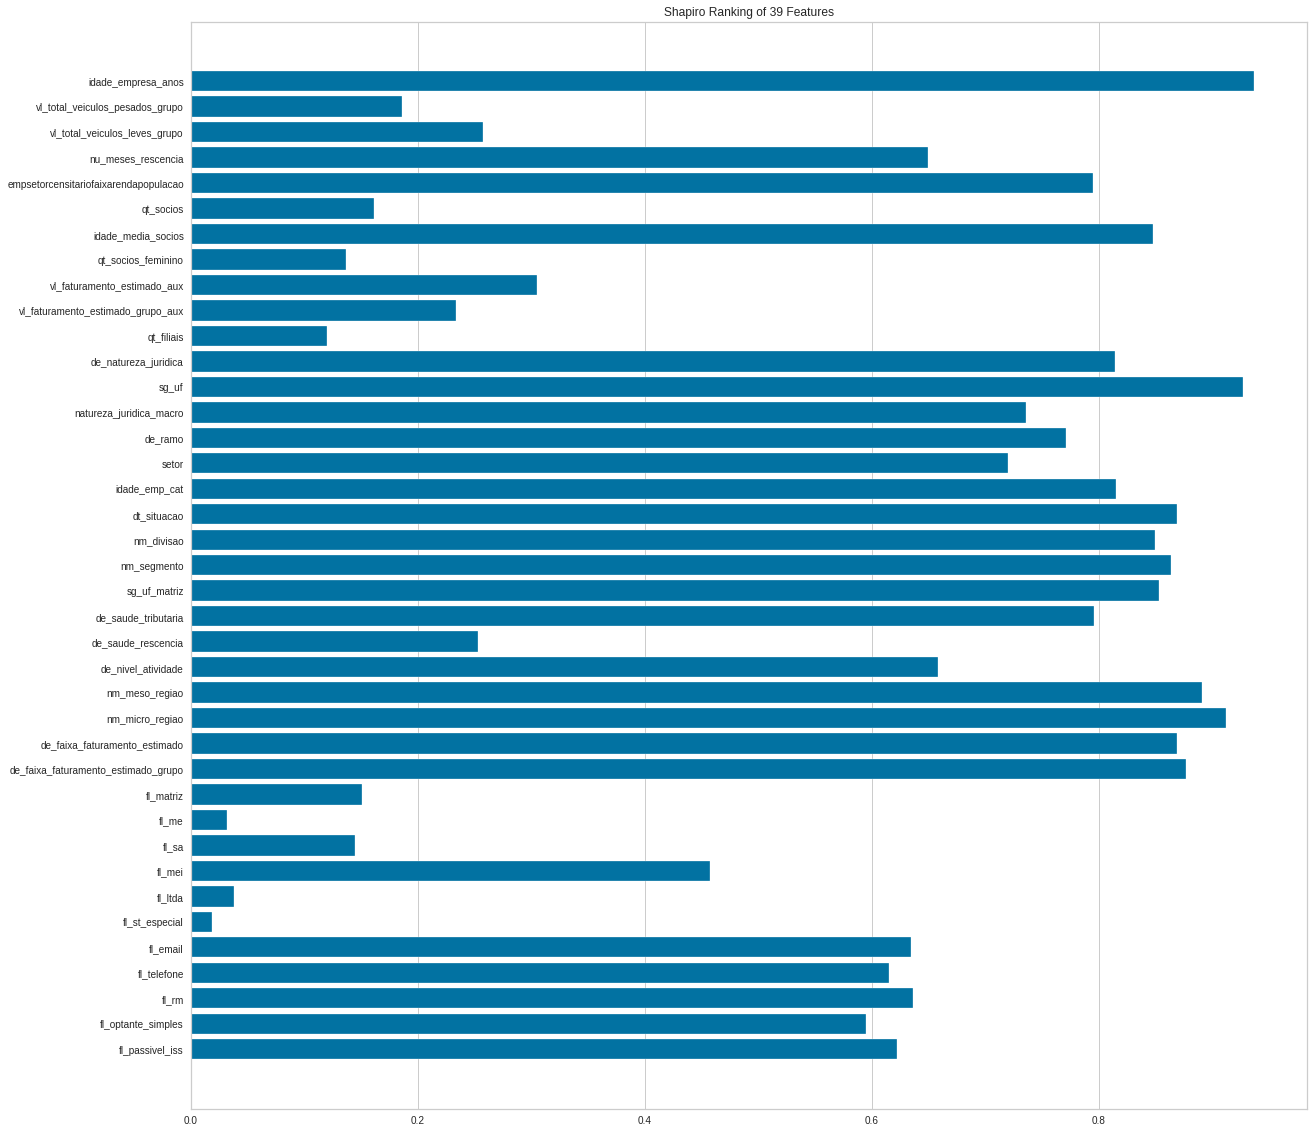

In [135]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(20,20))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

## Fazendo aprendizado supervisionado Classificação para aprender quem é do portfólio 1 e quem é do portfólio 2

### Separando a base em treino e teste

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Balanceando com RandomOverSampler

In [138]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [141]:
X_resampled.shape

(1580, 39)

In [143]:
from tpot import TPOTClassifier

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [144]:
tp = TPOTClassifier(generations=6, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [145]:
tp.fit(X_resampled, y_resampled)

Generation 1 - Current best internal CV score: 0.961392405063291
Generation 2 - Current best internal CV score: 0.961392405063291
Generation 3 - Current best internal CV score: 0.961392405063291
Generation 4 - Current best internal CV score: 0.9645569620253165
Generation 5 - Current best internal CV score: 0.9645569620253165
Generation 6 - Current best internal CV score: 0.9645569620253165

Best pipeline: GradientBoostingClassifier(SGDClassifier(input_matrix, alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate=constant, loss=squared_hinge, penalty=elasticnet, power_t=0.0), learning_rate=1.0, max_depth=10, max_features=0.2, min_samples_leaf=15, min_samples_split=9, n_estimators=100, subsample=0.7500000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=6,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [146]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9645569620253165
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="squared_hinge", penalty="elasticnet", power_t=0.0)),
    Gr

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive


In [148]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="squared_hinge", penalty="elasticnet", power_t=0.0)),
    GradientBoostingClassifier(learning_rate=1.0, max_depth=10, max_features=0.2, min_samples_leaf=15, min_samples_split=9, n_estimators=100, subsample=0.7500000000000001)
)

In [149]:
model = exported_pipeline.fit(X_resampled, y_resampled)
y_pred = exported_pipeline.predict(X_test)

## Curva ROC

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


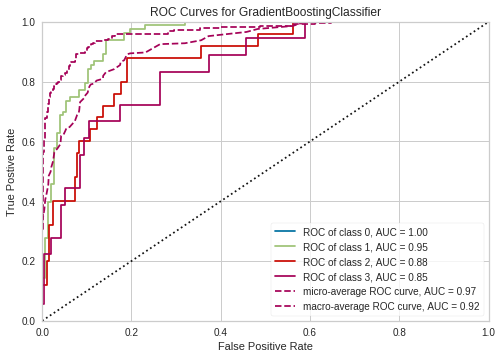

In [150]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_resampled, y_resampled)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [152]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       0.79      0.87      0.83        83
           2       0.42      0.44      0.43        25
           3       0.56      0.28      0.37        18

    accuracy                           0.83       230
   macro avg       0.69      0.65      0.66       230
weighted avg       0.83      0.83      0.83       230



In [153]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[104,   0,   0,   0],
       [  0,  72,   9,   2],
       [  0,  12,  11,   2],
       [  0,   7,   6,   5]])

In [154]:
print("Acurácia (base de treinamento):", model.score(X_resampled, y_resampled))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.8347826086956521


In [155]:
from sklearn.metrics import r2_score

In [156]:
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.66


## Colocando Regularização L2 para evitar o overfitting

In [157]:
from sklearn.linear_model import Ridge, Lasso

In [158]:
ridge = Ridge().fit(X_resampled, y_resampled)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge alpha=1
Acurácia na base de treinamento: 0.71
Acurácia na base de teste: 0.55
Ridge alpha=10
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.66
Ridge alpha=0.1
Acurácia na base de treinamento: 0.62
Acurácia na base de teste: 0.66


In [95]:
y_test.tail()

id
205dcd433329ad0a8b914b4ce399468389d3a256cdcbc5b8374a2fc2021971e7    1
28bc1d74d06eb184ee5a3ee242bae4492ad9df618c9c0fbcf442f22ad9ca6bae    1
9972062f53b10be62fea2303c52c15fd89674ce245f13b3db804f881eed7c654    1
ce2979f832ad09358b4458d514e4fc4af463cbcb778f1736cecd01a342f986a0    1
3af4369fa3199094e1738f9e21f73ca9f459c122ad4c4642b6704e23c9aebf85    1
Name: Target, dtype: int64

In [96]:
y_pred

array([0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 3, 0, 1, 2, 0, 1, 1, 1, 1, 1])

## Prevendo agora no market com a amostra tirada também do portfólio 1

In [159]:
amostra_port1.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss
499,a82392610e8dd76bf440b1569735e8fb067acf62f49150...,2.020032,-0.049370,-0.040273,-0.047208,-0.791301,-0.385871,-1.272734,-0.498539,-0.018107,...,0,0,0,0,0,0,0,1,0,0
500,95f14ce5d306594a11b21d5a2c2802c0043fd360ef5e26...,-0.991610,-0.049370,-0.040273,-1.908080,0.269057,-0.042511,-1.272734,-0.498539,-0.025092,...,0,0,0,0,0,1,1,0,1,1
501,e688eb037a9fb9c08cbe34573a28bea8275dab5439b44b...,-0.857411,-0.049370,-0.040273,-1.315984,-0.791301,-0.042511,-0.122764,-0.498539,-0.018107,...,0,0,1,0,0,1,1,0,1,1
502,ff4ad7a26c1ef7ec42bf5ec66888c43203f44bac4e9d53...,-0.166186,-0.049370,-0.040273,-0.047208,-0.075623,-0.385871,-1.272734,-0.498539,-0.018107,...,0,0,0,0,0,1,0,0,0,0
503,168c6e1e4a2621661c4aac3eeaf3d80dc1c85ad5c3b0f1...,-0.882199,-0.021765,-0.036121,-1.908080,-0.131265,0.300849,1.248355,0.936862,0.030427,...,0,0,0,0,0,0,1,1,1,0


In [160]:
amostra_port1_indexid = amostra_port1.copy()
amostra_port2_indexid = amostra_port2.copy()
amostra_port3_indexid = amostra_port3.copy()
amostra_port4_indexid = amostra_port4.copy()

In [161]:
amostra_port1_indexid.set_index('id', inplace=True)
amostra_port2_indexid.set_index('id', inplace=True)
amostra_port3_indexid.set_index('id', inplace=True)
amostra_port4_indexid.set_index('id', inplace=True)

In [163]:
merge_not.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,id
0,0.468908,-0.04937,-0.040273,0.037377,-0.791301,0.300849,0.673370,-0.498539,0.079092,-0.045441,...,0,0,0,0,1,1,1,1,1,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,-0.882484,-0.04937,-0.040273,-1.146814,-0.379493,-0.042511,-0.078534,-0.498539,-0.018107,-0.045865,...,0,1,0,0,1,1,1,1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,-0.296966,-0.04937,-0.040273,0.291132,-0.164715,-0.042511,0.142614,-0.498539,-0.023429,-0.045888,...,0,1,0,0,0,1,1,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,-0.357370,-0.04937,-0.040273,0.291132,-0.373521,-0.042511,0.319533,-0.498539,-0.018107,-0.045865,...,0,0,0,0,1,1,1,1,1,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,-0.701843,-0.04937,-0.040273,0.375717,1.732643,-0.042511,-1.272734,-0.498539,-0.018107,-0.045865,...,0,0,0,0,1,1,1,1,1,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [164]:
just_market_indexid = merge_not.copy()

In [165]:
just_market_indexid.set_index('id', inplace=True)

In [166]:
base_test_all_port= pd.concat([amostra_port1_indexid,amostra_port2_indexid,amostra_port3_indexid,amostra_port4_indexid, just_market_indexid],axis=0)

In [167]:
base_test_all_port.shape

(461149, 39)

In [168]:
amostra_port2_indexid.shape

(46, 39)

In [169]:
X_test_base = base_test_all_port

In [170]:
y_pred_test = exported_pipeline.predict(X_test_base)

In [171]:
pd.DataFrame(y_pred_test)[0].value_counts()

0    449912
1      7891
2      3129
3       217
Name: 0, dtype: int64

## Criando um y_test com as amostras para ver a acurácia 

In [172]:
amostra_port1_indexid_target = amostra_port1_indexid.copy()
amostra_port2_indexid_target = amostra_port2_indexid.copy()
amostra_port3_indexid_target = amostra_port3_indexid.copy()
amostra_port4_indexid_target = amostra_port4_indexid.copy()

In [173]:
amostra_port1_indexid_target['Target'] = 0
amostra_port2_indexid_target['Target'] = 1
amostra_port3_indexid_target['Target'] = 2
amostra_port4_indexid_target['Target'] = 3

In [174]:
base_y_test_all_port = pd.concat([amostra_port1_indexid_target,amostra_port2_indexid_target,amostra_port3_indexid_target,amostra_port4_indexid_target],axis=0)

In [175]:
base_y_test_all_port.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,Target
id,,,,,,,,,,,,,,,,,,,,,
a82392610e8dd76bf440b1569735e8fb067acf62f49150816d466b037a5e9351,2.020032,-0.049370,-0.040273,-0.047208,-0.791301,-0.385871,-1.272734,-0.498539,-0.018107,-0.045865,...,0,0,0,0,0,0,1,0,0,0
95f14ce5d306594a11b21d5a2c2802c0043fd360ef5e2602c4ecbccc4de4a872,-0.991610,-0.049370,-0.040273,-1.908080,0.269057,-0.042511,-1.272734,-0.498539,-0.025092,-0.045777,...,0,0,0,0,1,1,0,1,1,0
e688eb037a9fb9c08cbe34573a28bea8275dab5439b44b9f76cc72223f14316e,-0.857411,-0.049370,-0.040273,-1.315984,-0.791301,-0.042511,-0.122764,-0.498539,-0.018107,-0.045865,...,0,1,0,0,1,1,0,1,1,0
ff4ad7a26c1ef7ec42bf5ec66888c43203f44bac4e9d532c43affbd9273a724e,-0.166186,-0.049370,-0.040273,-0.047208,-0.075623,-0.385871,-1.272734,-0.498539,-0.018107,-0.045834,...,0,0,0,0,1,0,0,0,0,0
168c6e1e4a2621661c4aac3eeaf3d80dc1c85ad5c3b0f1133567a93daab56141,-0.882199,-0.021765,-0.036121,-1.908080,-0.131265,0.300849,1.248355,0.936862,0.030427,-0.043512,...,0,0,0,0,0,1,1,1,0,0


In [176]:
base_y_test_all_port.shape

(129, 40)

In [180]:
y_pred_test_test = pd.DataFrame(y_pred_test, columns = ['Target'])[:129]

In [181]:
print("Acurácia de previsão:", accuracy_score(base_y_test_all_port['Target'], y_pred_test_test['Target']))

Acurácia de previsão: 0.813953488372093
